---
# 1. Linear Regression
---

## 1.7. First Regression in Python

In [2]:
# Import the required libraries and print their respective versions.

import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

libs = ['np', 'pd', 'scipy', 'sm', 'sklearn', 'plt', 'sns']
for lib in libs:
    version = lib + '.__version__'
    try:
        print(f"{version:<21}:  {eval(version):>3}")
    except:
        pass


np.__version__       :  1.26.2
pd.__version__       :  2.1.3
scipy.__version__    :  1.11.4
sm.__version__       :  0.14.2
sklearn.__version__  :  1.3.2
sns.__version__      :  0.13.1


In [3]:
data = pd.read_csv('1.01. Simple linear regression.csv')
display(data.iloc[[0,3,9,-9,-1]])
data.describe()

,SAT,GPA
0,1714,2.40
3,1685,2.74
9,1850,3.01
75,2015,3.62
83,2050,3.81


,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


#### Create the first regression

In [4]:
# Define the dependent/predicted var (y) and the independent/predictor var (x1)
y = data.GPA
x1 = data.SAT
type(y), type(x1)

(pandas.core.series.Series, pandas.core.series.Series)

Text(0, 0.5, 'GPA')

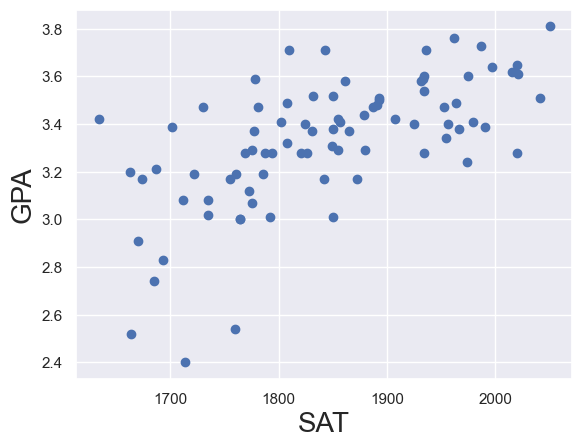

In [5]:
# Explore the data (using an scatter plot)
plt.scatter(x1, y)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
#plt.show()

In [6]:
# Regression itself
x = sm.add_constant(x1)         # const = 1.0 for all values of x1
results = sm.OLS(y,x).fit()     # results contains the output of the Ordinary Least Squares (OLS) regression
                                # fit() will apply a specific estimation technique (OLS here) to obtain the fit of the model.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           7.20e-11
Time:                        10:53:48   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

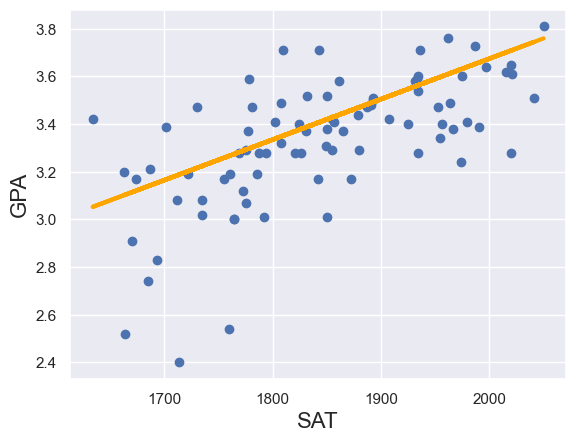

In [7]:
# Showing the regression line in the same scatter plot
plt.scatter(x1, y)
yhat = 0.2750 + 0.0017 * x1
fig = plt.plot(x1, yhat, lw=3, c='orange')      #, label='regression line')
plt.xlabel('SAT', fontsize=16)
plt.ylabel('GPA', fontsize=16)
plt.show()
# That’s the best fitting line, or the line which is closest to all observations simultaneously.

## 1.8. Table interpretation - Hypothesis zero.

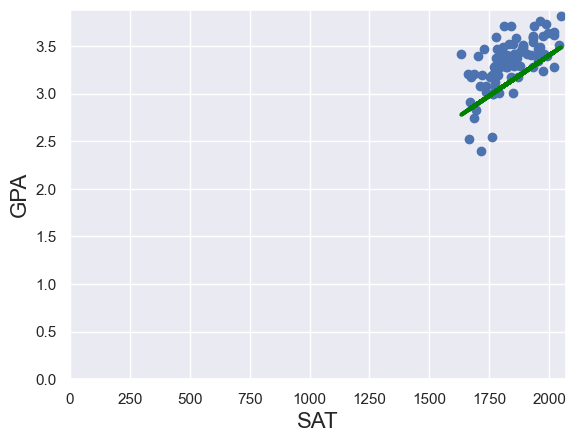

In [11]:
# Regression line considering the null hypothesis where b0 = 0
    # the regression line crosses the y-axis at the origin (x=0, y=0)
plt.scatter(x1, y)
yhat = 0 + 0.0017 * x1
fig = plt.plot(x1, yhat, lw=3, c='green')      #, label='regression line')
plt.xlabel('SAT', fontsize=16)
plt.ylabel('GPA', fontsize=16)
plt.xlim(0)
plt.ylim(0)
plt.show()

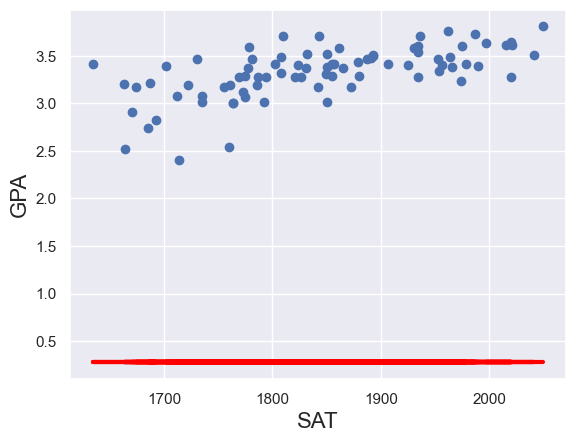

In [14]:
# Regression line considering the null hypothesis where b1 = 0
    # Horizontal regression line (0 times x1 always = 0) crossing the y-axis in 0.275 
plt.scatter(x1, y)
yhat = 0.275 + 0 * x1
fig = plt.plot(x1, yhat, lw=3, c='red')      #, label='regression line')
plt.xlabel('SAT', fontsize=16)
plt.ylabel('GPA', fontsize=16)
plt.show()

In [18]:
# p-value > 0.05 no significantly diff from 0 - GPA for SAT = 1850
0 + 0.0017 * 1850

3.145

In [19]:
0.275 + 0.0017 * 1850

3.42